## Introduction

We sought out to explore a dataset on Friends, the TV show, and our objective was to focus on the directors of the show and analyze success of the directors through episode viewership.

Data description - following columns and description:
- `season` - season of the episode
- `episode_num_in_season` - episode number in the particular season
- `epiosde_num_overall` - epiosde number in the entire series
- `title` - title of the episode
- `directed_by` - director of the episode
- `written_by` - writers of the episode
- `original_air_date`
- `prod_code`
- `us_viewers` - viewership numbers
- `imdb_rating` - IMDB rating
- `total_votes`
- `desc`
- character lines, count of dialogue lines and words per character

## Initialization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('merged_dataset.csv').drop('Unnamed: 0', axis=1)
df['original_air_date'] = pd.to_datetime(df['original_air_date'], format='%Y-%m-%d')

In [4]:
# display info on dataset
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   season                 236 non-null    int64         
 1   episode_num_in_season  236 non-null    int64         
 2   episode_num_overall    236 non-null    int64         
 3   title                  236 non-null    object        
 4   directed_by            236 non-null    object        
 5   written_by             236 non-null    object        
 6   original_air_date      236 non-null    datetime64[ns]
 7   prod_code              236 non-null    object        
 8   us_viewers             236 non-null    float64       
 9   imdb_rating            235 non-null    float64       
 10  total_votes            235 non-null    float64       
 11  desc                   235 non-null    object        
 12  rachel                 228 non-null    float64       
 13  monic

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,...,phoebe,joey,chandler,ross,rachel_words,monica_words,phoebe_words,joey_words,chandler_words,ross_words
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0,8.3,...,19.0,39.0,39.0,47.0,832.0,749.0,313.0,459.0,445.0,581.0
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0,8.0,...,13.0,8.0,16.0,62.0,460.0,286.0,118.0,58.0,243.0,723.0
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0,8.1,...,38.0,28.0,36.0,33.0,237.0,496.0,481.0,208.0,495.0,320.0
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0,8.1,...,31.0,24.0,32.0,40.0,570.0,455.0,337.0,225.0,431.0,490.0
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0,8.4,...,23.0,36.0,35.0,40.0,383.0,324.0,217.0,391.0,352.0,578.0


## An analysis of the directors of Friends

## (Who is the most successful Friends Director by viewership?)

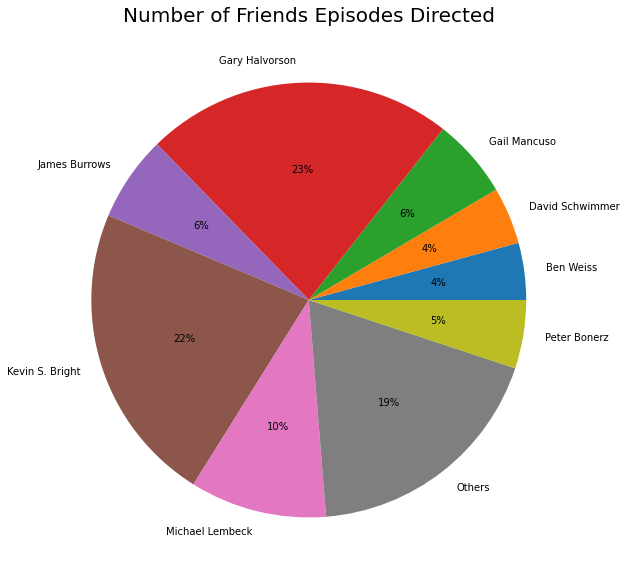

In [8]:
# Directors ranked by number of episodes directed
df_directors = df.copy()
top8_most_directed = ['Gary Halvorson', 'Kevin S. Bright', 'Michael Lembeck', 'James Burrows', 'Gail Mancuso', 'Peter Bonerz', 'Ben Weiss', 'David Schwimmer']
df_directors['directed_by'] = df['directed_by'].where(df['directed_by'].isin(top8_most_directed), 'Others')

# Visualize by pie chart
df_directors['directed_by'].value_counts()
df_directors.groupby('directed_by')['season'].count().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.ylabel('')
plt.title('Number of Friends Episodes Directed', fontsize=20)
plt.show()

In [ ]:
# export to json
df_directors.groupby('directed_by')['season'].count().to_json('directors_piechart.json')

### Named directors with >= 10 episodes/director. Others represent ~20 directors with < 7 episodes/director.

### 8 directors represent 81% of all the episode of Friends

## Evaluating the directors against viewership number

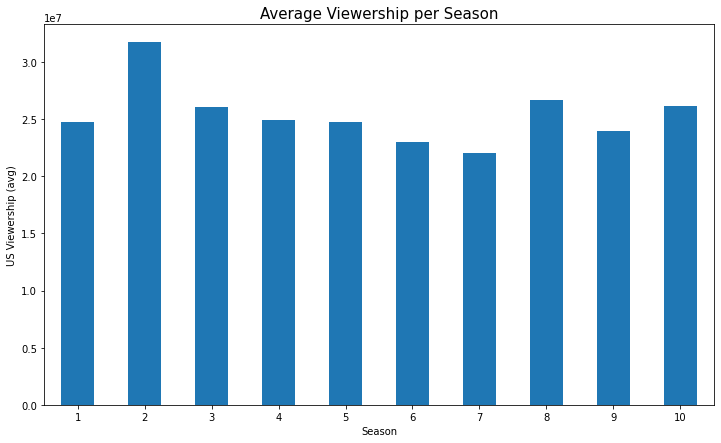

In [11]:
# Average viewership grouped by season
df.groupby('season')['us_viewers'].mean().plot(kind='bar', figsize=(12, 7), rot=0)
plt.xlabel('Season')
plt.ylabel('US Viewership (avg)')
plt.title('Average Viewership per Season', fontsize=15)
plt.show()

In [ ]:
# export to json
df.groupby('season')['us_viewers'].mean().to_json('viewership_by_season.json')

### Season 2 has the highest viewership, while Season 7 has the lowest viewership

In [9]:
season1 = df.query('season == 1')
season2 = df.query('season == 2')
season3 = df.query('season == 3')
season4 = df.query('season == 4')
season5 = df.query('season == 5')
season6 = df.query('season == 6')
season7 = df.query('season == 7')
season8 = df.query('season == 8')
season9 = df.query('season == 9')
season10 = df.query('season == 10')

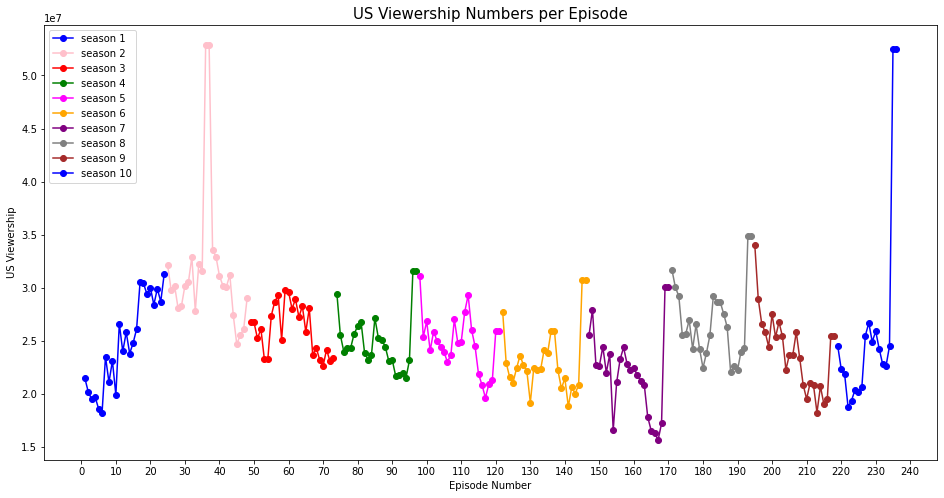

In [10]:
# Look at viewership vs episode number (viewership over time)
plt.figure(figsize=(16, 8))
plt.plot(season1['episode_num_overall'], season1['us_viewers'], '-o', color='blue')
plt.plot(season2['episode_num_overall'], season2['us_viewers'], '-o', color='pink')
plt.plot(season3['episode_num_overall'], season3['us_viewers'], '-o', color='red')
plt.plot(season4['episode_num_overall'], season4['us_viewers'], '-o', color='green')
plt.plot(season5['episode_num_overall'], season5['us_viewers'], '-o', color='magenta')
plt.plot(season6['episode_num_overall'], season6['us_viewers'], '-o', color='orange')
plt.plot(season7['episode_num_overall'], season7['us_viewers'], '-o', color='purple')
plt.plot(season8['episode_num_overall'], season8['us_viewers'], '-o', color='gray')
plt.plot(season9['episode_num_overall'], season9['us_viewers'], '-o', color='brown')
plt.plot(season10['episode_num_overall'], season10['us_viewers'], '-o', color='blue')
plt.legend(['season 1', 'season 2', 'season 3', 'season 4', 'season 5', 'season 6', 'season 7', 'season 8', 'season 9', 'season 10'])
plt.xlabel('Episode Number')
plt.xticks(range(0, 250, 10))
plt.ylabel('US Viewership')
plt.title('US Viewership Numbers per Episode', fontsize=15)
plt.show()

### better observe individual episodes and their viewership, note the outliers

In [14]:
# Four episodes that have over 50 million views, which are these episodes?
df.query("us_viewers > 40000000")[['season', 'episode_num_in_season', 'episode_num_overall', 'title', 'us_viewers']].sort_values(by='us_viewers', ascending=False)

,season,episode_num_in_season,episode_num_overall,title,us_viewers
35,2,12,36,The One After the Superbowl: Part 1,52900000.0
36,2,13,37,The One After the Superbowl: Part 2,52900000.0
234,10,17,235,The Last One,52460000.0
235,10,18,236,The Last One,52460000.0


## Directors behind the highest viewed and lowest viewed episodes

In [9]:
# Who directed the highest viewed episode?
director = df.groupby('directed_by')[['us_viewers', 'season', 'episode_num_in_season', 'episode_num_overall']].max()
display(director.sort_values(by='us_viewers', ascending=False).head(3))

,us_viewers,season,episode_num_in_season,episode_num_overall
directed_by,,,,
Michael Lembeck,52900000.0,7,24,148
Kevin S. Bright,52460000.0,10,25,236
James Burrows,33600000.0,4,23,88


## Lowest viewed episodes?

In [8]:
display(director.sort_values(by='us_viewers', ascending=True).head(5))

,us_viewers,season,episode_num_in_season,episode_num_overall
directed_by,,,,
Kevin S. Bright & Gary Halvorson,17230000.0,7,22,168
Arlene Sanford,18200000.0,1,6,6
Todd Holland,21880000.0,5,18,115
Stephen Prime,22240000.0,7,13,159
Pamela Fryman,23390000.0,3,25,73


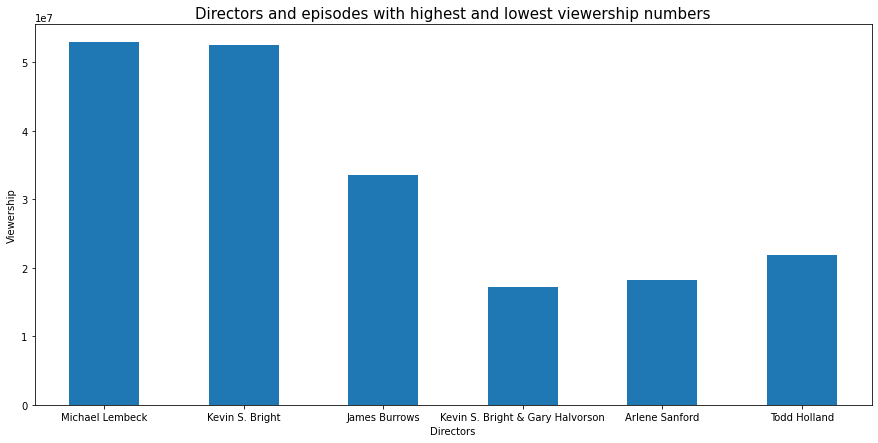

In [14]:
a = director.sort_values(by='us_viewers', ascending=False)['us_viewers'].head(3)
b = director.sort_values(by='us_viewers', ascending=True)['us_viewers'].head(3)

c = pd.concat([a, b])
c.plot(kind='bar', figsize=(15, 7), rot=0)
plt.xlabel('Directors')
plt.ylabel('Viewership')
plt.title('Directors and episodes with highest and lowest viewership numbers', fontsize=15)
plt.show()

# Convert to json
c.to_json('highest_lowest_viewed_directors.json')

### Kevin Bright - associated with one of the highest viewed episodes, also associated with the lowest view episode.

### Other lowest viewed episodes by guest directors having directed the only episode

## Split analysis between 'Core' directors and 'Guest' directors

In [62]:
directors_top8 = df['directed_by'].value_counts().head(8).index.tolist()
print(directors_top8)

['Gary Halvorson', 'Kevin S. Bright', 'Michael Lembeck', 'James Burrows', 'Gail Mancuso', 'Peter Bonerz', 'Ben Weiss', 'David Schwimmer']


## Which 'core' director has best average viewership numbers?

In [74]:
director_top8_mean = df[df['directed_by'].isin(directors_top8)].groupby('directed_by')[['us_viewers']].mean()
director_top8_mean['std'] = df[df['directed_by'].isin(directors_top8)].groupby('directed_by')[['us_viewers']].std()['us_viewers']
display(director_top8_mean.sort_values(by='us_viewers', ascending=False))

,us_viewers,std
directed_by,,
Michael Lembeck,2.958792e+07,7.850129e+06
Kevin S. Bright,2.733358e+07,6.504331e+06
Gail Mancuso,2.552000e+07,2.937196e+06
Peter Bonerz,2.500583e+07,3.440514e+06
James Burrows,2.477667e+07,4.232236e+06
David Schwimmer,2.443300e+07,2.668595e+06
Ben Weiss,2.378000e+07,3.152072e+06
Gary Halvorson,2.236130e+07,2.558919e+06


In [84]:
# average viewership of entire series
df['us_viewers'].mean()

25390805.08474576

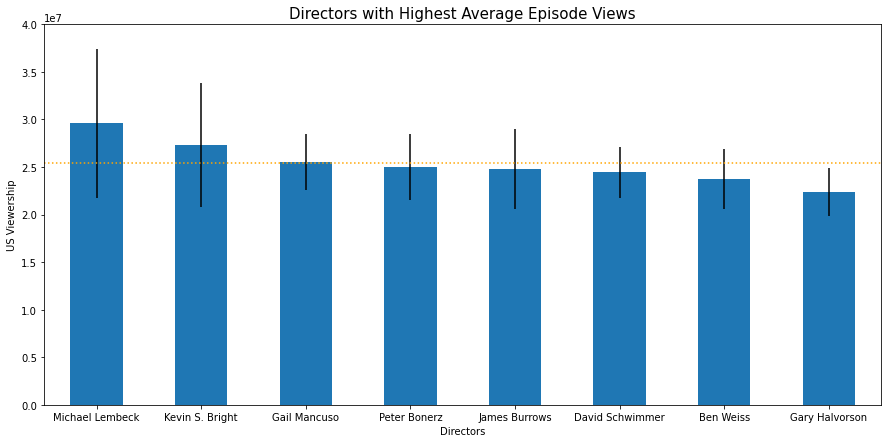

In [85]:
director_top8_mean['us_viewers'].sort_values(ascending=False).plot(kind='bar', yerr=director_top8_mean.sort_values(by='us_viewers', ascending=False)['std'], rot=0, figsize=(15, 7))
plt.ylim(0, 4e7)
plt.xlabel('Directors')
plt.ylabel('US Viewership')
plt.title('Directors with Highest Average Episode Views', fontsize=15)
plt.axhline(y=df['us_viewers'].mean(), color='orange', linestyle='dotted')
plt.show()

In [ ]:
# Convert to json
director_top8_mean['us_viewers'].sort_values(ascending=False).to_json('directors_highestaverageepviews.json')

### By viewership numbers, Michael Lembeck directed Friends' episodes draw the largest viewership numbers. He directed the highest viewed episode in the whole series, and doesn't rank in the lowest viewed episodes.

## Conclusions

Based on our analysis on Friends viewership and comparing with the 'core' directors, Michael Lembeck takes the top place as the most successful Friends director in terms of episode viewership.

Michael Lembeck has contributed to directing a significant number of Friends' episodes, 10% or 24 episodes. This puts him in the top 3 for total number of Friends' episodes directed. He is responsible for the highest viewed episode in the entire series (The One After The Superbowl, Season 2, Episode 12/13), and furthermore his directed episodes have the highest average viewership compared to the other 'core' directors.

Although Michael clearly rises to the top when we only look at viewership numbers, there are other factors that could be explored. For example, how does Michael Lembeck directed episodes correlate to episode ratings and do those episodes tend to rank higher? The writers are also an important factor in the content of the episode, and is there a stronger correlation with the writers of the episodes over the director?

## Supplementary Data Analysis

## 'Guest' Directors

In [86]:
gdirectors_mean = df[~df['directed_by'].isin(directors_top8)].groupby('directed_by')[['us_viewers']].mean()
gdirectors_mean['std'] = df[~df['directed_by'].isin(directors_top8)].groupby('directed_by')[['us_viewers']].std()['us_viewers']
display(gdirectors_mean.sort_values(by='us_viewers', ascending=False))

,us_viewers,std
directed_by,,
Mary Kay Place,3.290000e+07,NaN
Thomas Schlamme,3.190000e+07,4.242641e+05
Ellen Gittelsohn,2.830000e+07,NaN
Robby Benson,2.793167e+07,2.502514e+06
Joe Regalbuto,2.702000e+07,NaN
Sheldon Epps,2.628000e+07,4.825650e+06
Andrew Tsao,2.602000e+07,NaN
Sam Simon,2.584000e+07,NaN
Shelley Jensen,2.556500e+07,2.012508e+06


c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


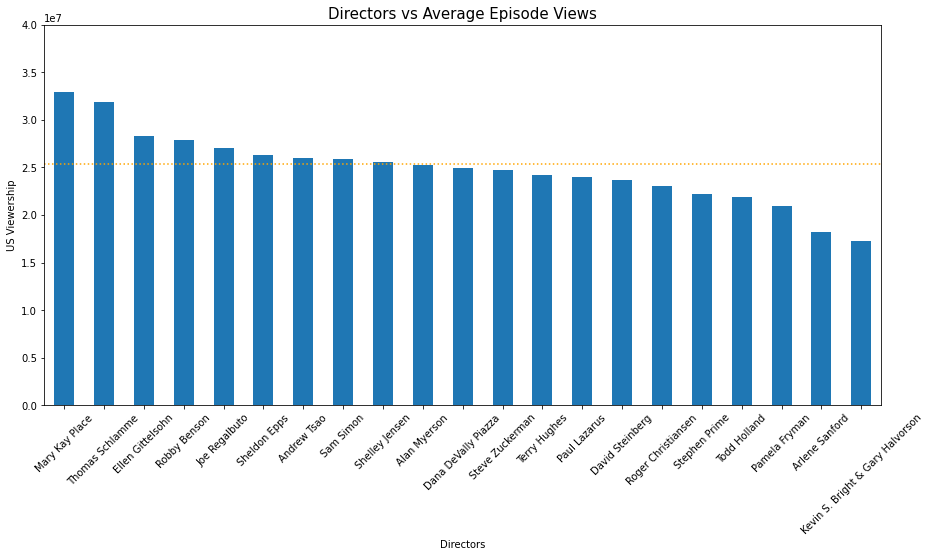

In [89]:
gdirectors_mean['us_viewers'].sort_values(ascending=False).plot(kind='bar', yerr=director_top8_mean.sort_values(by='us_viewers', ascending=False)['std'], rot=45, figsize=(15, 7))
plt.ylim(0, 4e7)
plt.xlabel('Directors')
plt.ylabel('US Viewership')
plt.title('Directors vs Average Episode Views', fontsize=15)
plt.axhline(y=df['us_viewers'].mean(), color='orange', linestyle='dotted')
plt.show()

## Directors who had the biggest difference in viewership

In [31]:
director_max = df.groupby('directed_by')[['us_viewers', 'season', 'episode_num_in_season', 'episode_num_overall']].max()
director_min = df.groupby('directed_by')[['us_viewers', 'season', 'episode_num_in_season', 'episode_num_overall']].min()
# display(director_max.sort_values(by='us_viewers', ascending=False))
# display(director_min.sort_values(by='us_viewers', ascending=False))
director_max['us_viewers_diff'] = director_max['us_viewers'] - director_min['us_viewers']
display(director_max.sort_values(by='us_viewers_diff', ascending=False).head())

,us_viewers,season,episode_num_in_season,episode_num_overall,us_viewers_diff
directed_by,,,,,
Kevin S. Bright,52460000.0,10,25,236,35890000.0
Michael Lembeck,52900000.0,7,24,148,32270000.0
James Burrows,33600000.0,4,23,88,14100000.0
Terry Hughes,29800000.0,9,20,213,11560000.0
Gary Halvorson,26960000.0,10,23,234,11310000.0


## Best average viewership of the directors

In [44]:
director_mean = df.groupby('directed_by')[['us_viewers']].mean()
director_mean['std'] = df.groupby('directed_by')[['us_viewers']].std()['us_viewers']
display(director_mean.sort_values(by='us_viewers', ascending=False).head())

,us_viewers,std
directed_by,,
Mary Kay Place,3.290000e+07,NaN
Thomas Schlamme,3.190000e+07,4.242641e+05
Michael Lembeck,2.958792e+07,7.850129e+06
Ellen Gittelsohn,2.830000e+07,NaN
Robby Benson,2.793167e+07,2.502514e+06


c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 1.0, 'Directors with Highest Average Episode Views')

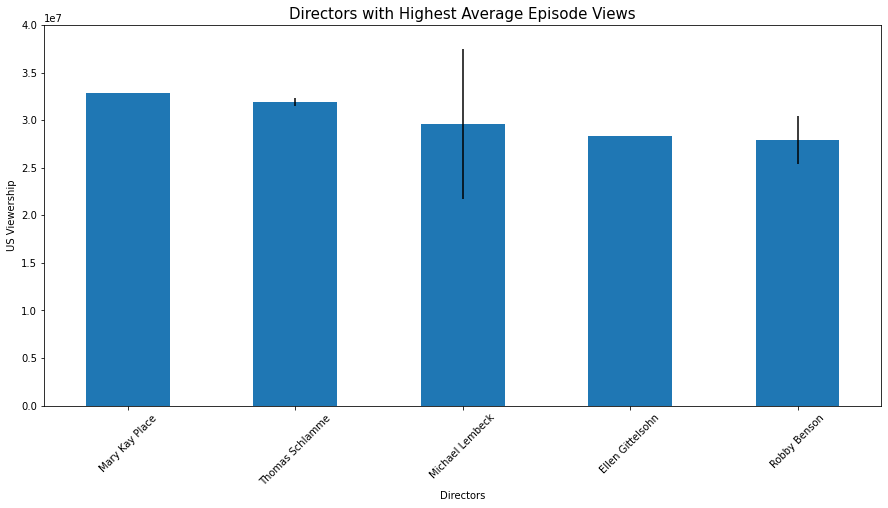

In [56]:
director_mean['us_viewers'].sort_values(ascending=False)[:5].plot(kind='bar', yerr=director_mean.sort_values(by='us_viewers', ascending=False)['std'][:5], rot=45, figsize=(15, 7))
plt.ylim(0, 4e7)
plt.xlabel('Directors')
plt.ylabel('US Viewership')
plt.title('Directors with Highest Average Episode Views', fontsize=15)

## Analysis of character lines and words

In [80]:
# Character lines per season - who had the most lines per season?
characters = ['rachel', 'monica', 'phoebe', 'joey', 'chandler', 'ross']

a = df.groupby('season')[characters].agg('sum')
a['mostlines'] = a.apply(lambda row: row[row == row.max()].index.tolist()[0], axis=1)
a['max'] = a[characters].max(axis=1)
print(a)

        rachel  monica  phoebe   joey  chandler    ross mostlines     max
season                                                                   
1        850.0   872.0   636.0  640.0     817.0   950.0      ross   950.0
2        671.0   683.0   586.0  656.0     688.0   868.0      ross   868.0
3        925.0   847.0   793.0  775.0     825.0  1075.0      ross  1075.0
4        937.0   789.0   700.0  837.0     929.0   836.0    rachel   937.0
5        906.0   898.0   813.0  932.0     941.0   870.0  chandler   941.0
6        993.0   901.0   787.0  909.0    1037.0   913.0  chandler  1037.0
7       1098.0   912.0   811.0  948.0     855.0   839.0    rachel  1098.0
8       1083.0   812.0   771.0  911.0     676.0   983.0    rachel  1083.0
9        910.0   880.0   807.0  874.0     925.0   899.0  chandler   925.0
10       771.0   686.0   689.0  733.0     686.0   865.0      ross   865.0


In [81]:
# Character total words spoken per season - who spoke the most words?
character_words = ['rachel_words', 'monica_words', 'phoebe_words', 'joey_words', 'chandler_words', 'ross_words']
b = df.groupby('season')[character_words].agg('sum')
b['mostwords'] = b.apply(lambda row: row[row == row.max()].index.tolist()[0], axis=1)
b['max'] = b[character_words].max(axis=1)
print(b)

        rachel_words  monica_words  phoebe_words  joey_words  chandler_words  \
season                                                                         
1             9846.0        8507.0        7039.0      6719.0          9551.0   
2             7570.0        7275.0        8192.0      7776.0          7954.0   
3             9749.0        9188.0       10348.0      9542.0          9926.0   
4            10670.0        8205.0        9080.0      9367.0         10451.0   
5            11609.0        9806.0       10071.0     11438.0          9680.0   
6            11912.0        9694.0        9387.0     12547.0         12434.0   
7            13406.0       10742.0        9486.0     11563.0         10079.0   
8            12747.0        9624.0        8451.0     11821.0          7004.0   
9            10748.0        9592.0       10507.0     10776.0         12257.0   
10            8995.0        7792.0        8099.0      8366.0          7198.0   

        ross_words       mostwords     

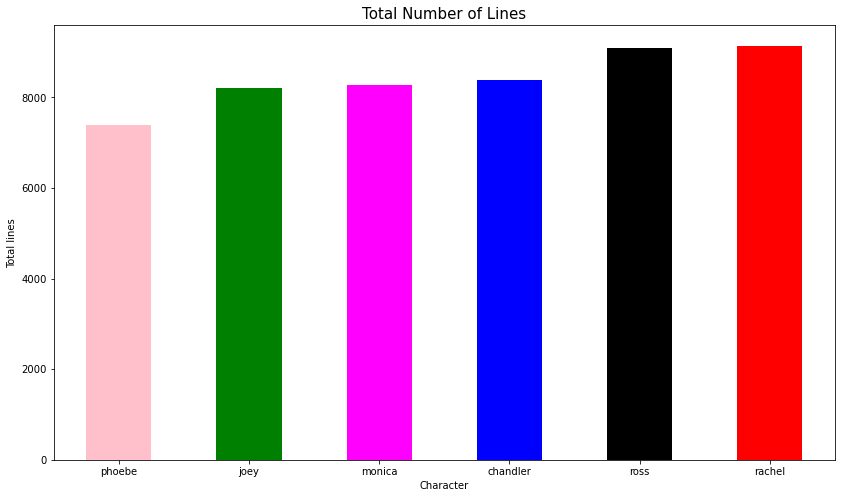

In [82]:
# Total number of lines in whole show
c = df.groupby('season')[characters].agg('sum').sum().sort_values(ascending=True)
plt.figure(figsize=(14,8))
c.plot(kind='bar', rot=0, color=['pink', 'green', 'magenta', 'blue', 'black', 'red'])
plt.ylabel('Total lines')
plt.xlabel('Character')
plt.title('Total Number of Lines', fontsize=15)
plt.show()

In [83]:
# Any correlation between viewership, IMDB ratings, and total votes?
print(df[['us_viewers', 'imdb_rating', 'total_votes']].corr())

             us_viewers  imdb_rating  total_votes
us_viewers     1.000000     0.325557     0.380040
imdb_rating    0.325557     1.000000     0.508557
total_votes    0.380040     0.508557     1.000000


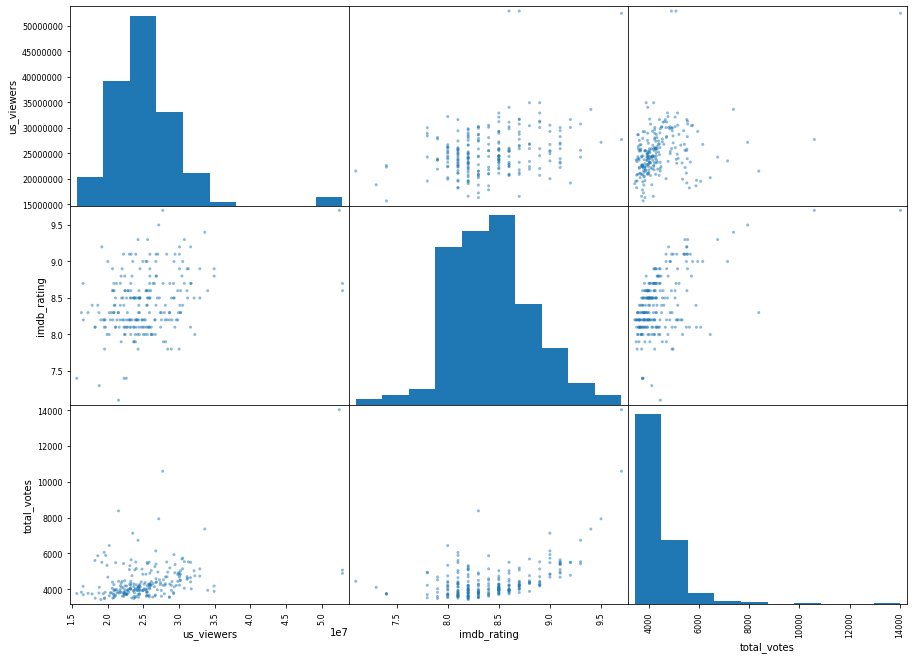

In [84]:
# Plotting correlation
pd.plotting.scatter_matrix(df[['us_viewers', 'imdb_rating', 'total_votes']], figsize=(15,11))
plt.show()

In [85]:
# Who directed the highest viewed episode, highest IMDB rated episode?
director = df.groupby('directed_by')[['us_viewers', 'imdb_rating']].max()
display(director)

,us_viewers,imdb_rating
directed_by,,
Alan Myerson,25800000.0,8.6
Andrew Tsao,26020000.0,8.6
Arlene Sanford,18200000.0,8.1
Ben Weiss,29240000.0,8.8
Dana DeVally Piazza,25870000.0,8.7
David Schwimmer,30040000.0,9.1
David Steinberg,23660000.0,8.5
Ellen Gittelsohn,28300000.0,8.2
Gail Mancuso,30200000.0,9.0
